<a href="https://colab.research.google.com/github/skyhigh31/Tensorflow-ML/blob/master/Intel_imageClassifier_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AEI5mF4Kzqw1yxzMrTiqpcQ1wsBmlnizAyr8QVr4aa7b4VVTsQZHrQ
Mounted at /content/drive


In [59]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow


In [18]:
pre_trained_model= InceptionV3(
    include_top= False,
    input_shape=(150,150,3)
)

for layer in pre_trained_model.layers:
  layer.trainable= False

In [ ]:
# pre_trained_model.summary()

In [22]:
last_layer= pre_trained_model.get_layer("mixed7")
last_output= last_layer.output

In [23]:
x= layers.Flatten()(last_output)
x= layers.Dense(124, activation="relu")(x)
x= layers.Dense(6, activation="softmax")(x)

model= Model(pre_trained_model.input, x)


In [44]:
model.compile(
    optimizer="adam",
    loss= "categorical_crossentropy",
    metrics= ["acc"]
)

In [ ]:
# model.summary()

In [45]:
train_datagen= ImageDataGenerator(
    rescale= 1/255,
    rotation_range= 0.2,
    width_shift_range= 0.1,
    height_shift_range= 0.2,
    brightness_range= [0,0.2],
    zoom_range= 0.2,
    horizontal_flip= True,
    vertical_flip= True
)

validation_datagen= ImageDataGenerator(
    rescale= 1/255,
)

In [46]:
train_data_generator= train_datagen.flow_from_directory(
    "/content/drive/My Drive/Kaggle/intel-image-classification/seg_train/seg_train",
    batch_size= 200,
    target_size= (150,150)
)

validation_data_generator= validation_datagen.flow_from_directory(
    "/content/drive/My Drive/Kaggle/intel-image-classification/seg_test/seg_test",
    batch_size= 100,
    target_size= (150,150)
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [47]:
checkpoint_path = "/content/drive/My Drive/Kaggle/pre_trained_models/intel_kraggle_image_classifier_091020/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [48]:
history= model.fit(
    train_data_generator,
    validation_data= validation_data_generator,
    steps_per_epoch= 10,
    epochs= 10,
    validation_steps= 5,
    verbose= 1, 
    callbacks= [cp_callback]
)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 4.6221 - acc: 0.2800 
Epoch 00001: saving model to /content/drive/My Drive/Kaggle/pre_trained_models/intel_kraggle_image_classifier_091020/cp.ckpt
10/10 [==============================] - 686s 69s/step - loss: 4.6221 - acc: 0.2800 - val_loss: 2.2899 - val_acc: 0.2940
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 1.4476 - acc: 0.4956 
Epoch 00002: saving model to /content/drive/My Drive/Kaggle/pre_trained_models/intel_kraggle_image_classifier_091020/cp.ckpt
10/10 [==============================] - 553s 55s/step - loss: 1.4476 - acc: 0.4956 - val_loss: 0.8249 - val_acc: 0.6800
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 1.0428 - acc: 0.6055 
Epoch 00003: saving model to /content/drive/My Drive/Kaggle/pre_trained_models/intel_kraggle_image_classifier_091020/cp.ckpt
10/10 [==============================] - 469s 47s/step - loss: 1.0428 - acc: 0.6055 - val_loss: 0.6845 - val_acc:

In [49]:
model.save("/content/drive/My Drive/Kaggle/pre_trained_models/intel_kraggle_image_classifier_091020/")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Kaggle/pre_trained_models/intel_kraggle_image_classifier_091020/assets


In [52]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss= history.history["loss"]
val_loss= history.history["val_loss"]
epoches= range(len(acc))

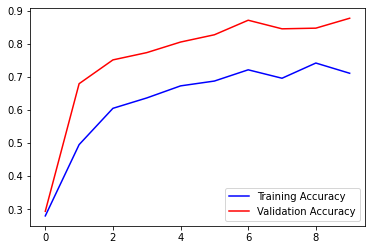

In [53]:
plt.plot(epoches, acc, "b", label= "Training Accuracy")
plt.plot(epoches, val_acc, "r", label= "Validation Accuracy")
plt.legend(loc=0)
plt.show()

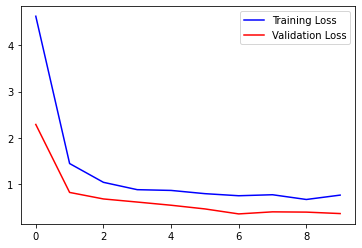

In [54]:
plt.plot(epoches, loss, "b", label= "Training Loss")
plt.plot(epoches, val_loss, "r", label= "Validation Loss")
plt.legend(loc=0)
plt.show()

In [ ]:
pred_dir= "/content/drive/My Drive/Kaggle/intel-image-classification/seg_pred/seg_pred/"
pred_img= os.listdir(pred_dir)

for fn in pred_img:
  path= pred_dir + fn
  img= image.load_img(path, target_size=(150,150))

  x= image.img_to_array(img)
  cv2_imshow(x)
  x= np.expand_dims(x, axis=0)

  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes)

  if classes[0][0] >0.7:
    print(fn + " is a building predicted at = "+ str(classes[0][0]*100) + "%\n")
  elif classes[0][1] >0.7:
    print(fn + " is a forest predicted at = "+ str(classes[0][1]*100) + "%\n")
  elif classes[0][2] >0.7:
    print(fn + " is a glacier predicted at = "+ str(classes[0][2]*100) + "%\n")
  elif classes[0][3] >0.7:
    print(fn + " is a mountain predicted at = "+ str(classes[0][3]*100) + "%\n")
  elif classes[0][4] >0.7:
    print(fn + " is a sea predicted at = "+ str(classes[0][4]*100) + "%\n")
  elif classes[0][5] >0.7:
    print(fn + " is a street predicted at = "+ str(classes[0][5]*100) + "%\n")
  else:
    print(fn+ " Cannot determined! \n")